<a href="https://colab.research.google.com/drive/1xpnrSNoLA6JD8NIcpz495fQlzm3ziuRZ" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A comparative study on detection of Parkinson's disease with the images of Spiral/Wave test using fast.ai

## Introduction

In this tutorial, you will learn how to use fast.ai to automatically detect Parkinson’s disease in hand-drawn images of spirals and waves.

While preparing this document, I received help from Sayak Paul's work. [Githup Page](https://github.com/sayakpaul/Parkinson-s-Disease-Classifier).



I came across two studies on this data set. 


In the first study, author used classical computer vision techniques like Histogram of Oriented Gradients (HOG) for quantifying the features of the images and used them to train a Random Forest Classifier. He got an accuracy of 83.33%. [Reference](https://www.pyimagesearch.com/2019/04/29/detecting-parkinsons-disease-with-opencv-computer-vision-and-the-spiral-wave-test/).

In the other study, author used deep learning technique.
The author preferred Resnet34 architecture as a method. He got an accuracy of 88%. [Reference](https://github.com/sayakpaul/Parkinson-s-Disease-Classifier).

In this study, 6 different deep learning methods were used and a comparative analysis was performed. In addition, the learning rate, which significantly affects the success rate, has been taken into consideration and the value of the learning rate giving the best results has been tried to be determined.

I used the fastai library. This library is super easy to use and comes ready with a lot of state-of-the-art practices. It provides a number of useful functions that make the life of a deep learning practitioner easy [Reference](https://github.com/sayakpaul/Parkinson-s-Disease-Classifier).


Colab notebooks are now powered with Tesla T4 GPUS.This study was performed on Colab platform.

## Dataset

The dataset as created by Adriano de Oliveira Andrade and Joao Paulo Folado from the NIATS of Federal University of Uberlândia. [Dataset](http://www.niats.feelt.ufu.br/en/node/81)

The dataset consists of 204 images and is pre-split into a training set and a testing set, consisting of:

1.   Spiral: 102 images, 72 training, and 30 testing
2.   Wave: 102 images, 72 training, and 30 testing

Figure 1 shows examples of each of the drawings and corresponding classes.

![Fig. 1. Parkinson’s image dataset is curated by Andrade and Folado from the NIATS of Federal University of Uberlândia](https://www.pyimagesearch.com/wp-content/uploads/2019/04/detect_parkinsons_dataset.jpg)

 

## Parkinson's Disease

![Patients with Parkinson’s disease have nervous system issues. Symptoms include movement issues such as tremors and rigidity.](https://www.pyimagesearch.com/wp-content/uploads/2019/04/detect_parkinsons_opencv_patient.jpg)


Parkinson’s disease is a nervous system disorder that affects movement. The disease is progressive and is marked by five different stages [Reference](https://www.parkinson.org/Understanding-Parkinsons/What-is-Parkinsons/Stages-of-Parkinsons).


1. Stage 1: Mild symptoms that do not typically interfere with daily life, including tremors and movement issues on only one side of the body. 
2. Stage 2: Symptoms continue to become worse with both tremors and rigidity now affecting both sides of the body. Daily tasks become challenging.
3. Stage 3: Loss of balance and movements with falls becoming frequent and common. The patient is still capable of (typically) living independently.
4. Stage 4: Symptoms become severe and constraining. The patient is unable to live alone and requires help to perform daily activities.
5. Stage 5: Likely impossible to walk or stand. The patient is most likely wheelchair bound and may even experience hallucinations.

One of the symptoms of Parkinson’s is tremors and rigidity in the muscles, making it harder to draw smooth spirals and waves (Reference: [Document](https://www.pyimagesearch.com/2019/04/29/detecting-parkinsons-disease-with-opencv-computer-vision-and-the-spiral-wave-test/).

Parkinson's disease detection is an important research area in the computer vision and machine learning.

## Application

In [0]:
# Get the fastai libraries and other important stuff: https://course.fast.ai/start_colab.html
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# Authenticate Colab to use my Google Drive for data storage and retrieval
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Parkinson'

Mounted at /content/gdrive


In [0]:
base_dir

'/content/gdrive/My Drive/Parkinson'

In [0]:
# Tesla T4s
!nvidia-smi

Wed Aug 21 22:41:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   2397MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Setting the path for getting the data
path = root_dir + 'Parkinsons/dataset'; path

'/content/gdrive/My Drive/Parkinsons/dataset'

In [0]:
# A bunch of useful magic commands
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import *

In [0]:
import numpy as np
np.random.seed(7)

### Loading and preparing the data with fastai's [`ImageDataBunch`](https://docs.fast.ai/vision.data.html#ImageDataBunch) class

In [0]:
# We are loading the images in the size of 128x128. You can change it.
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=128, bs=8).normalize(imagenet_stats)


### Looking at the data

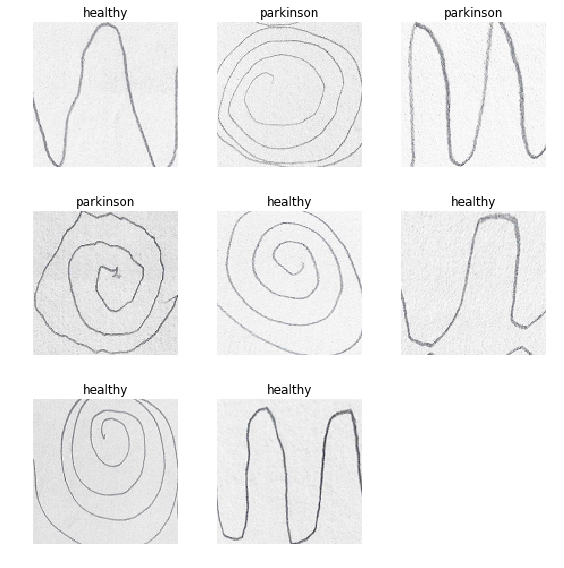

In [0]:
data.show_batch(rows=3, figsize=(8,8))

### Data labels and distributions

In [0]:
data.classes

['healthy', 'parkinson']

In [0]:
data.label_list

LabelLists;

Train: LabelList (144 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/gdrive/My Drive/Parkinsons/dataset;

Valid: LabelList (60 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/gdrive/My Drive/Parkinsons/dataset;

Test: None

### Beginning the model training process

epoch,train_loss,valid_loss,accuracy,time
0,0.942579,0.692626,0.616667,00:02
1,0.774792,0.611707,0.783333,00:02
2,0.736606,0.774178,0.816667,00:02
3,0.689544,0.612847,0.750000,00:02
4,0.649541,0.545134,0.800000,00:02
5,0.624492,0.500194,0.783333,00:02
6,0.608556,0.503789,0.833333,00:02
7,0.621633,0.488339,0.833333,00:02
8,0.579707,0.466007,0.833333,00:02
9,0.556559,0.465452,0.800000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.960996,0.519050,0.750000,00:02
1,0.869817,0.507156,0.783333,00:02
2,0.838149,0.734652,0.716667,00:02
3,0.721690,0.532908,0.716667,00:02
4,0.665439,0.544611,0.750000,00:02
5,0.616316,0.555599,0.766667,00:02
6,0.603403,0.565055,0.766667,00:02
7,0.546010,0.521795,0.750000,00:02
8,0.515802,0.547139,0.766667,00:02
9,0.535423,0.521826,0.783333,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.922827,0.639530,0.600000,00:03
1,0.775426,0.559628,0.750000,00:03
2,0.691775,0.426330,0.800000,00:03
3,0.629506,0.484099,0.800000,00:03
4,0.598396,0.496321,0.750000,00:03
5,0.621763,0.398322,0.816667,00:03
6,0.565132,0.333099,0.916667,00:03
7,0.527301,0.347026,0.866667,00:03
8,0.517964,0.338538,0.883333,00:03
9,0.464224,0.348633,0.900000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.053410,0.597441,0.716667,00:04
1,0.754969,0.626257,0.750000,00:04
2,0.704296,0.558463,0.783333,00:04
3,0.677600,0.471814,0.833333,00:04
4,0.675961,0.501751,0.800000,00:04
5,0.627569,0.692836,0.750000,00:04
6,0.549907,0.566296,0.733333,00:04
7,0.497720,0.560279,0.800000,00:04
8,0.489874,0.552524,0.816667,00:04
9,0.471905,0.534481,0.816667,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.938523,0.591440,0.633333,00:02
1,0.777925,0.457112,0.833333,00:02
2,0.758552,0.432312,0.816667,00:02
3,0.684935,0.388178,0.816667,00:02
4,0.602134,0.430443,0.833333,00:02
5,0.580279,0.531171,0.800000,00:02
6,0.579019,0.405642,0.833333,00:02
7,0.541284,0.404837,0.850000,00:02
8,0.511884,0.389188,0.816667,00:02
9,0.501463,0.390200,0.833333,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.968883,0.587040,0.716667,00:02
1,0.760551,0.504592,0.750000,00:02
2,0.730448,0.486576,0.783333,00:02
3,0.779132,0.499019,0.750000,00:02
4,0.748055,0.361374,0.816667,00:02
5,0.673942,0.490937,0.800000,00:02
6,0.663580,0.477981,0.800000,00:02
7,0.628851,0.384716,0.800000,00:02
8,0.614388,0.376143,0.816667,00:02
9,0.577450,0.366983,0.833333,00:02


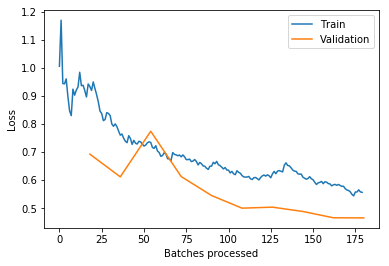

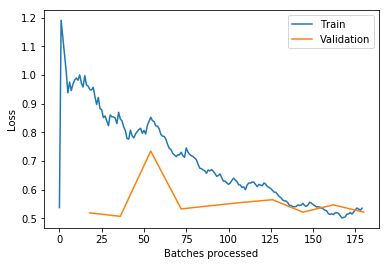

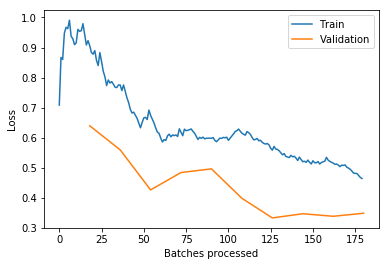

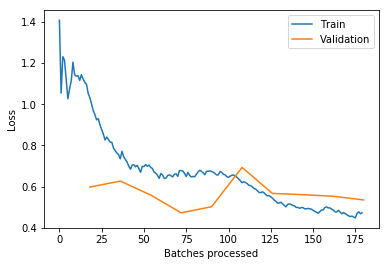

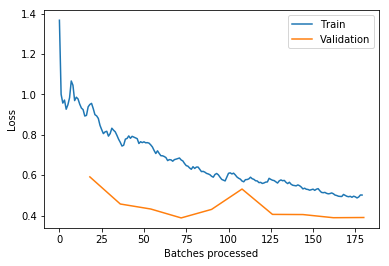

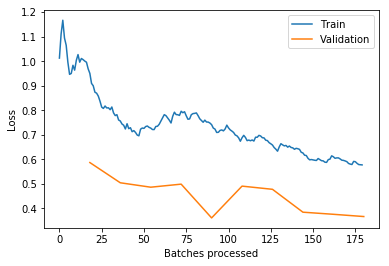

In [0]:
# Training with mixed precision

# resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(10);
learn.recorder.plot_losses()

# resnet50
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy).to_fp16()
learn1.fit_one_cycle(10);
learn1.recorder.plot_losses()

# densenet121
learn2 = cnn_learner(data, models.densenet121, metrics=accuracy).to_fp16()
learn2.fit_one_cycle(10);
learn2.recorder.plot_losses()

# densenet169
learn3 = cnn_learner(data, models.densenet169, metrics=accuracy).to_fp16()
learn3.fit_one_cycle(10);
learn3.recorder.plot_losses()

# vgg16
learn4 = cnn_learner(data, models.vgg16_bn, metrics=accuracy).to_fp16()
learn4.fit_one_cycle(10);
learn4.recorder.plot_losses()

# alexnet
learn5 = cnn_learner(data, models.alexnet, metrics=accuracy).to_fp16()
learn5.fit_one_cycle(10);
learn5.recorder.plot_losses()

The best score was obtained with the Densenet121 architecture. A success rate of approximately 92% was obtained at the 6th epoch. Min Training Loss: 0.565132	Min Validation Lost: 0.333099

Now let's determine the learning rate that gives good results. And let's repeat the experiments for each method.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.70E-07
Min loss divided by 10: 4.37E-04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.56E-07
Min loss divided by 10: 1.80E-04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.37E-07
Min loss divided by 10: 1.45E-04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.87E-07
Min loss divided by 10: 1.22E-05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.61E-07
Min loss divided by 10: 3.25E-04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.61E-07
Min loss divided by 10: 1.94E-08


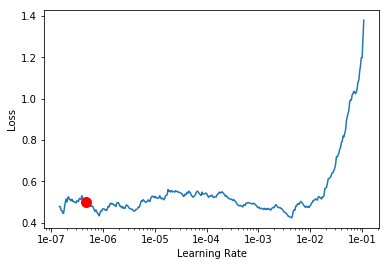

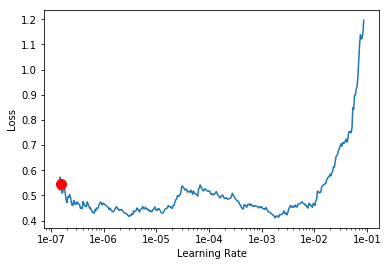

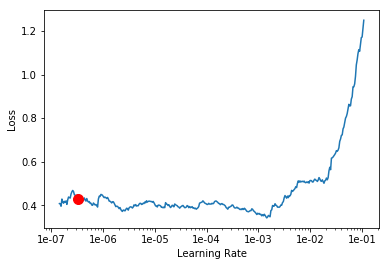

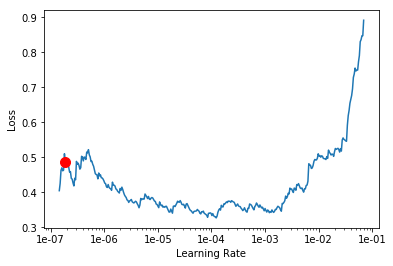

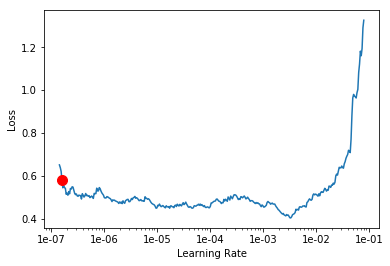

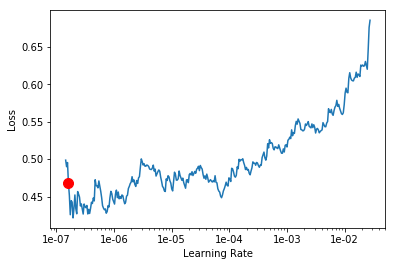

In [0]:
learn.lr_find(stop_div=True, num_it=500)
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

learn1.lr_find(stop_div=True, num_it=500)
learn1.recorder.plot(suggestion=True)
min_grad_lr1 = learn1.recorder.min_grad_lr

learn2.lr_find(stop_div=True, num_it=500)
learn2.recorder.plot(suggestion=True)
min_grad_lr2 = learn2.recorder.min_grad_lr

learn3.lr_find(stop_div=True, num_it=500)
learn3.recorder.plot(suggestion=True)
min_grad_lr3 = learn3.recorder.min_grad_lr

learn4.lr_find(stop_div=True, num_it=500)
learn4.recorder.plot(suggestion=True)
min_grad_lr4 = learn4.recorder.min_grad_lr

learn5.lr_find(stop_div=True, num_it=500)
learn5.recorder.plot(suggestion=True)
min_grad_lr5 = learn5.recorder.min_grad_lr

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, min_grad_lr)

learn1.unfreeze()
learn1.fit_one_cycle(10, min_grad_lr1)


learn2.unfreeze()
learn2.fit_one_cycle(10, min_grad_lr2)


learn3.unfreeze()
learn3.fit_one_cycle(10, min_grad_lr3)


learn4.unfreeze()
learn4.fit_one_cycle(10, min_grad_lr4)


learn5.unfreeze()
learn5.fit_one_cycle(10, min_grad_lr5)


epoch,train_loss,valid_loss,accuracy,time
0,0.559283,0.487377,0.816667,00:02
1,0.519193,0.449071,0.833333,00:02
2,0.471778,0.453483,0.833333,00:02
3,0.460976,0.446167,0.833333,00:02
4,0.465392,0.453242,0.833333,00:02
5,0.490436,0.465947,0.833333,00:02
6,0.502308,0.459270,0.816667,00:02
7,0.493825,0.460150,0.833333,00:02
8,0.494441,0.444846,0.833333,00:02
9,0.482615,0.438884,0.833333,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.471167,0.494747,0.766667,00:03
1,0.473795,0.534464,0.750000,00:03
2,0.456112,0.503854,0.783333,00:03
3,0.509882,0.497889,0.783333,00:03
4,0.487215,0.514079,0.750000,00:03
5,0.472283,0.554722,0.750000,00:03
6,0.470552,0.542112,0.783333,00:03
7,0.478957,0.576993,0.783333,00:03
8,0.467171,0.524403,0.750000,00:03
9,0.475006,0.555301,0.750000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.338154,0.351027,0.900000,00:04
1,0.418895,0.346616,0.866667,00:04
2,0.413129,0.344272,0.866667,00:04
3,0.419285,0.352596,0.850000,00:04
4,0.401994,0.346582,0.900000,00:04
5,0.397654,0.338685,0.916667,00:04
6,0.403768,0.327779,0.900000,00:04
7,0.442053,0.334383,0.883333,00:04
8,0.417239,0.342905,0.850000,00:04
9,0.418772,0.342739,0.916667,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.398134,0.510272,0.783333,00:05
1,0.357120,0.520696,0.816667,00:05
2,0.391353,0.497490,0.816667,00:05
3,0.399472,0.496708,0.816667,00:05
4,0.416011,0.509311,0.800000,00:05
5,0.410676,0.562277,0.800000,00:05
6,0.389967,0.487751,0.850000,00:05
7,0.371266,0.496011,0.816667,00:05
8,0.376746,0.518626,0.833333,00:05
9,0.369266,0.516567,0.850000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.497810,0.410185,0.850000,00:02
1,0.478739,0.404492,0.850000,00:02
2,0.490534,0.430650,0.800000,00:02
3,0.501283,0.420408,0.866667,00:02
4,0.523896,0.415896,0.833333,00:02
5,0.507629,0.419693,0.833333,00:02
6,0.447109,0.425294,0.850000,00:02
7,0.490106,0.414959,0.850000,00:02
8,0.483865,0.412411,0.816667,00:02
9,0.481699,0.433216,0.816667,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.486558,0.380784,0.833333,00:02
1,0.527119,0.378507,0.800000,00:02
2,0.450832,0.384983,0.800000,00:02
3,0.457381,0.441253,0.800000,00:02
4,0.462706,0.514447,0.833333,00:02
5,0.473248,0.528092,0.816667,00:02
6,0.462721,0.517519,0.816667,00:02
7,0.464033,0.385680,0.833333,00:02
8,0.447739,0.363493,0.850000,00:02
9,0.474968,0.378062,0.850000,00:02


The results obtained did not change significantly. The best score was obtained with the Densenet121 architecture. A success rate of approximately 92% was obtained at the 5th epoch. Min Training Loss: 0.397654	Min Validation Lost: 0.338685.

We will now interpret the model's performance so as to see its top losses. Fastai provides a handy [`ClassificationInterpretation`](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) class which makes this ridiculously easy. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

interp1 = ClassificationInterpretation.from_learner(learn1)
losses1,idxs1 = interp1.top_losses()
len(data.valid_ds)==len(losses1)==len(idxs1)


interp2 = ClassificationInterpretation.from_learner(learn2)
losses2,idxs2 = interp2.top_losses()
len(data.valid_ds)==len(losses2)==len(idxs2)


interp3 = ClassificationInterpretation.from_learner(learn3)
losses3,idxs3 = interp3.top_losses()
len(data.valid_ds)==len(losses3)==len(idxs3)


interp4 = ClassificationInterpretation.from_learner(learn4)
losses4,idxs4 = interp4.top_losses()
len(data.valid_ds)==len(losses4)==len(idxs4)

interp5 = ClassificationInterpretation.from_learner(learn5)
losses5,idxs5 = interp5.top_losses()
len(data.valid_ds)==len(losses5)==len(idxs5)

True

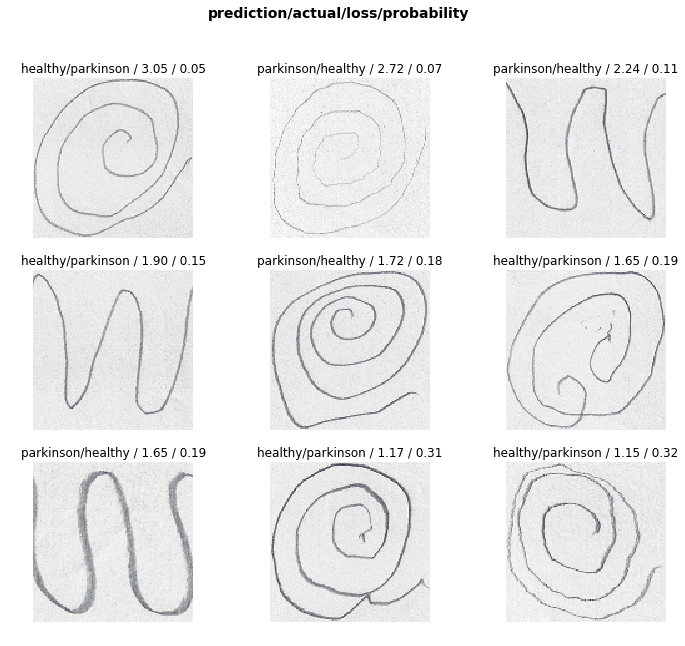

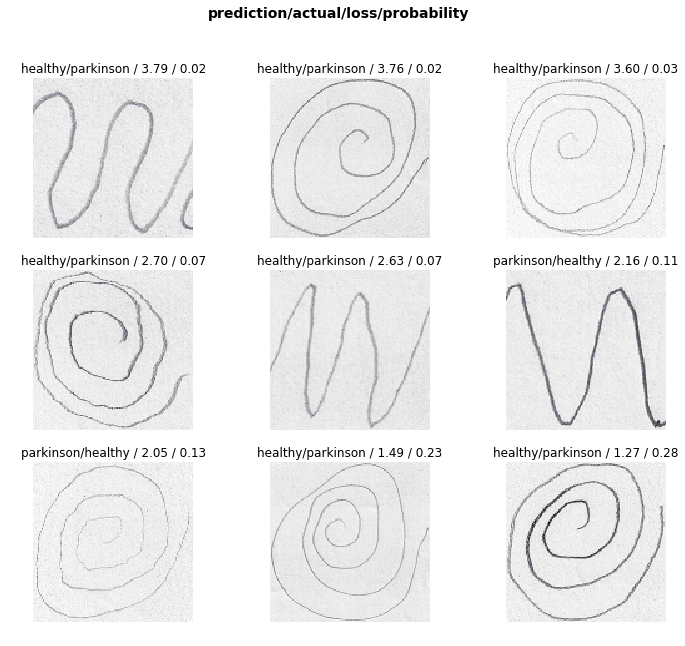

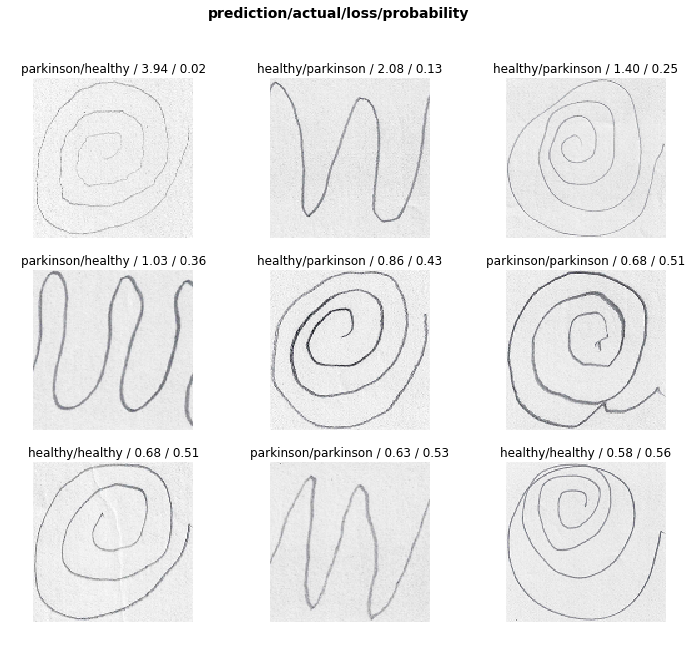

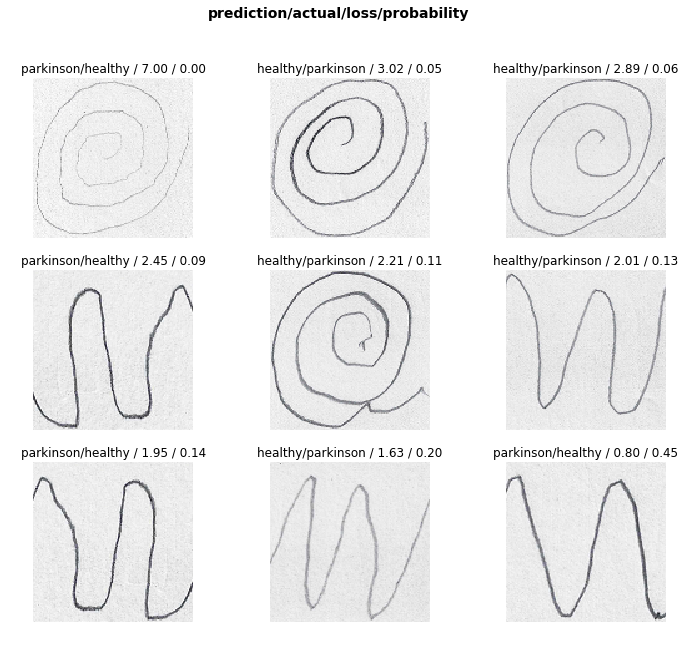

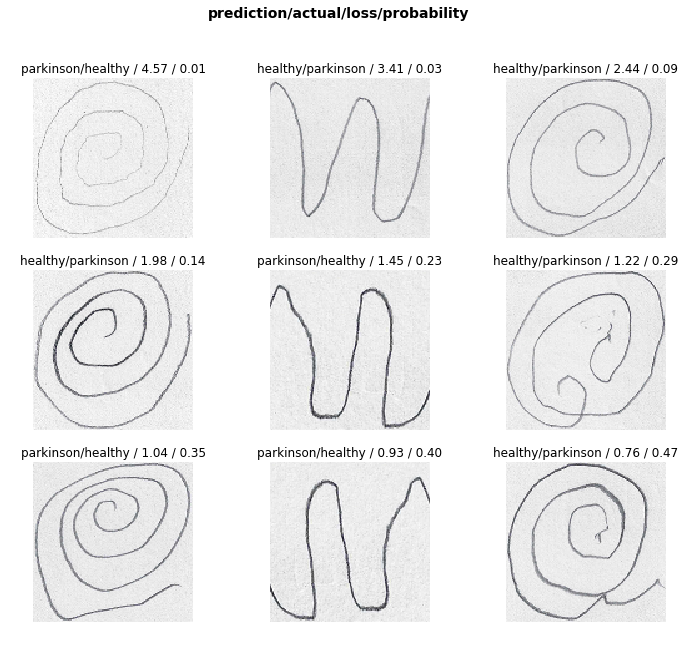

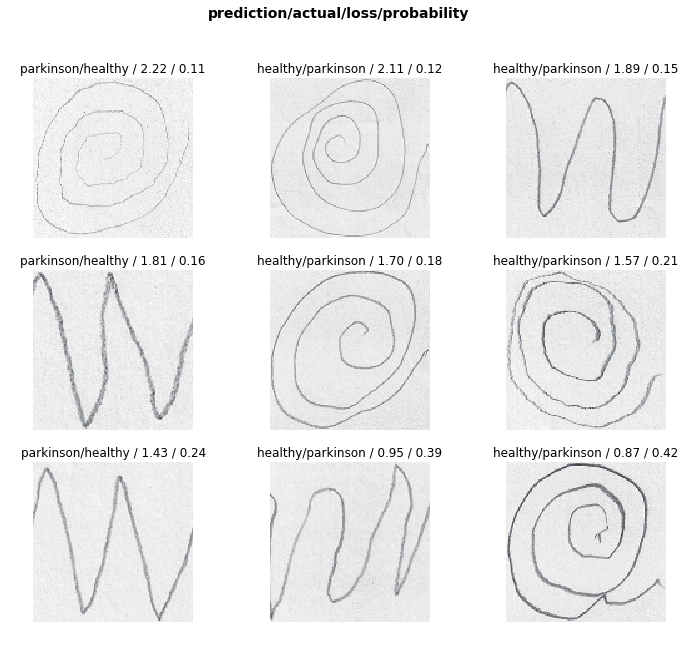

In [0]:
interp.plot_top_losses(9, figsize=(12,10), heatmap=False)

interp1.plot_top_losses(9, figsize=(12,10), heatmap=False)

interp2.plot_top_losses(9, figsize=(12,10), heatmap=False)

interp3.plot_top_losses(9, figsize=(12,10), heatmap=False)

interp4.plot_top_losses(9, figsize=(12,10), heatmap=False)

interp5.plot_top_losses(9, figsize=(12,10), heatmap=False)



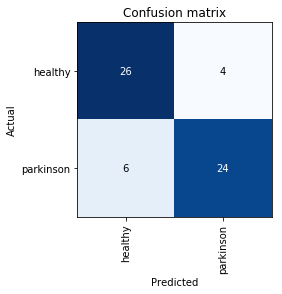

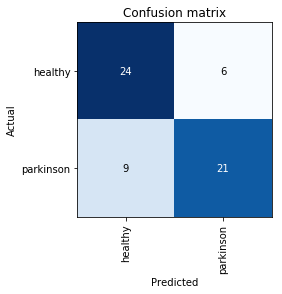

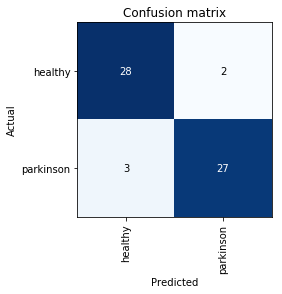

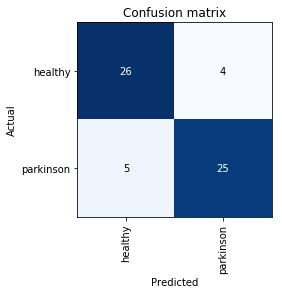

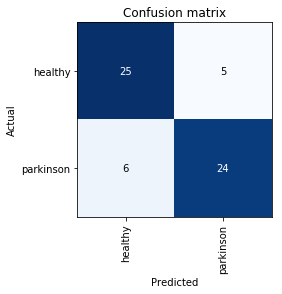

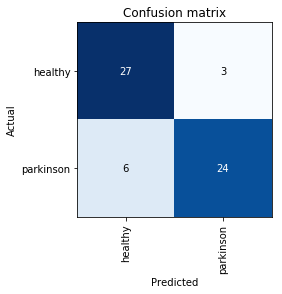

In [0]:
interp.plot_confusion_matrix()

interp1.plot_confusion_matrix()

interp2.plot_confusion_matrix()

interp3.plot_confusion_matrix()

interp4.plot_confusion_matrix()

interp5.plot_confusion_matrix()
